# Analysing dataset of cars for university task

### Requirements to run:
- Jupyter notebook installed
- Python 3 (my version was 3.7.6)
- Installed modules below
- Default notebook should be with outputs and results

In [1]:
import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#### Data source

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

#### Read file as table

In [3]:
df_source = pd.read_table(url, names=['params', 'car'])

#### View what is readed

In [4]:
df_source.head()

,params,car
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,ford torino


####  Preprocessing single row of source data

In [5]:
def preprocessing_row(row):
    row_divided = str(row).split('   ')
    row_filtered = list(filter(None, row_divided))
    item_list = []
    for item in row_filtered:
        if ' ' in item:
            x = item.split(' ')
            for single_item in x:
                item_list.append(single_item)
        else:
            item_list.append(item)
            
    return list(filter(None, item_list))

#### Preprocessing source row by row

In [6]:
list_of_item_list = []
for idx, row in df_source.iterrows():
    preprocessed_row = preprocessing_row(row['params'])
    preprocessed_row.append(row['car'])
    list_of_item_list.append(preprocessed_row)

## According task - short names of columns

In [7]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                'weight', 'acceleration', 'year', 'origin', 'car_name']

## According task - representation of data as dataframe

In [8]:
car_df = pd.DataFrame(list_of_item_list, columns=column_names)

In [9]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


## According task - removing last column

In [10]:
car_df.drop('car_name', axis=1, inplace=True)

In [11]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1


## According task - removing data gaps

In [12]:
car_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1
394,44.0,4,97.00,52.00,2130.,24.6,82,2
395,32.0,4,135.0,84.00,2295.,11.6,82,1
396,28.0,4,120.0,79.00,2625.,18.6,82,1


In [13]:
for ind, row in car_df.iterrows():
    for item in row:
        if item is '?':
            car_df.drop(index=ind, inplace=True)
            print('Row dropped!!')

Row dropped!!
Row dropped!!
Row dropped!!
Row dropped!!
Row dropped!!
Row dropped!!


In [14]:
car_df.reset_index(inplace=True)
car_df.drop('index', axis=1, inplace=True)

In [15]:
car_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.00,2790.,15.6,82,1
388,44.0,4,97.00,52.00,2130.,24.6,82,2
389,32.0,4,135.0,84.00,2295.,11.6,82,1
390,28.0,4,120.0,79.00,2625.,18.6,82,1


##### Checking if conversion to float is pass - in that case if it will be an error that will mean that not all gaps are removed or replaced by mean etc..

In [16]:
car_df = car_df.astype(float)

In [17]:
car_df.isnull().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


#### Short summaration

In [18]:
car_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [19]:
if not car_df.isnull().values.any():
    print('There is no gaps in data.. Done!')
else:
    print('Sometning gone wrong...')
    print('There should not have been here any gaps..')

There is no gaps in data.. Done!


## According task - medium mpg where cylinders equal 8 and horsepower bigger than median

#### Short description about preprocessed data without gaps

In [20]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
car_df.groupby('cylinders').count()

,mpg,displacement,horsepower,weight,acceleration,year,origin
cylinders,,,,,,,
3.0,4,4,4,4,4,4,4
4.0,199,199,199,199,199,199,199
5.0,3,3,3,3,3,3,3
6.0,83,83,83,83,83,83,83
8.0,103,103,103,103,103,103,103


In [22]:
df = car_df.copy()

In [23]:
median_of_power = np.median(df['horsepower'].astype(float))

#### Values with condition of task
##### It might me replaced by using query like: 
###### df_cutted = df.query('horsepower > {} & cylinders == {}'.format(median_of_power, 8))

In [24]:
df_cutted = df[(df.horsepower > median_of_power) & (df.cylinders == 8)]

In [25]:
df_cutted

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
288,15.5,8.0,351.0,142.0,4054.0,14.3,79.0,1.0
289,19.2,8.0,267.0,125.0,3605.0,15.0,79.0,1.0
290,18.5,8.0,360.0,150.0,3940.0,13.0,79.0,1.0
296,23.0,8.0,350.0,125.0,3900.0,17.4,79.0,1.0


In [26]:
mean_mpg = np.mean(df_cutted['mpg'])

In [27]:
mean_mpg

14.875490196078433

## According task - Show on chart medium mpg for each 2 years group of cars

In [28]:
df = car_df.copy()

In [29]:
df.groupby('year').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
year,,,,,,,
70.0,29,29,29,29,29,29,29
71.0,27,27,27,27,27,27,27
72.0,28,28,28,28,28,28,28
73.0,40,40,40,40,40,40,40
74.0,26,26,26,26,26,26,26
75.0,30,30,30,30,30,30,30
76.0,34,34,34,34,34,34,34
77.0,28,28,28,28,28,28,28
78.0,36,36,36,36,36,36,36


In [30]:
year_mean_mpg_list = []
for single_year in df.groupby('year').groups.keys():
    df_for_year = df[df.year == single_year]
    mean_mpg = np.mean(df[df.year == single_year]['mpg'])
    year_mean_mpg_list.append([single_year, mean_mpg])

In [31]:
year_mean_mpg_df = pd.DataFrame(year_mean_mpg_list, columns=['year', 'mpg'])

In [32]:
year_mean_mpg_df

,year,mpg
0,70.0,17.689655
1,71.0,21.111111
2,72.0,18.714286
3,73.0,17.100000
4,74.0,22.769231
5,75.0,20.266667
6,76.0,21.573529
7,77.0,23.375000
8,78.0,24.061111
9,79.0,25.093103


In [33]:
mean_for_2_years = []
for i in range(0, int(len(year_mean_mpg_df)), 2):
    if i != 12:
        mean_mpg = (year_mean_mpg_df['mpg'].iloc[i] + year_mean_mpg_df['mpg'].iloc[i + 1])/2
        mean_for_2_years.append(mean_mpg)
        
mean_for_2_years.append(year_mean_mpg_df['mpg'].iloc[-1])

In [34]:
mean_for_2_years

[19.400383141762454,
 17.90714285714286,
 21.51794871794872,
 22.474264705882355,
 24.577107279693482,
 31.994708994708994,
 32.0]

In [35]:
years_names = ['70-71','72-73','74-75','76-77','78-79','80-81','82']

In [36]:
years_means = pd.DataFrame({'years': years_names, 'mpg': mean_for_2_years})

In [37]:
years_means

,years,mpg
0,70-71,19.400383
1,72-73,17.907143
2,74-75,21.517949
3,76-77,22.474265
4,78-79,24.577107
5,80-81,31.994709
6,82,32.000000


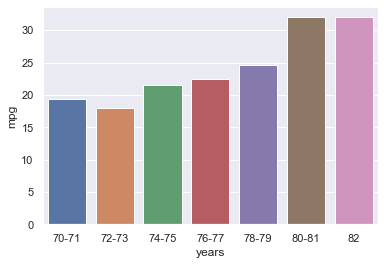

In [38]:
sns.set(style="darkgrid")
ax = sns.barplot(x="years", y="mpg", data=years_means)

## According task - On one painting draw 4 charts decomposition of explained variable and variables: displacement, horsepower, weight, acceleration. For each of them put linear regression

In [39]:
df = car_df.copy()

In [40]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [41]:
def create_linear_regressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print('MSE is eqal {}'.format(mean_squared_error(y_test, regressor.predict(X_test))))
    
    return regressor.predict(X)

In [42]:
X_displacement = df['displacement'].values.reshape(-1, 1)
X_horsepower = df['horsepower'].values.reshape(-1, 1)
X_weight = df['weight'].values.reshape(-1, 1)
X_acceleration = df['acceleration'].values.reshape(-1, 1)
y = df['mpg'].values

In [43]:
y_displacement_reg = create_linear_regressor(X_displacement, y)
y_horsepower_reg = create_linear_regressor(X_horsepower, y)
y_weight_reg = create_linear_regressor(X_weight, y)
y_acceleration_reg = create_linear_regressor(X_acceleration, y)

MSE is eqal 19.958623167481164
MSE is eqal 21.81114253145181
MSE is eqal 21.316415359562022
MSE is eqal 46.04789998565202


Text(0, 0.5, 'mpg')

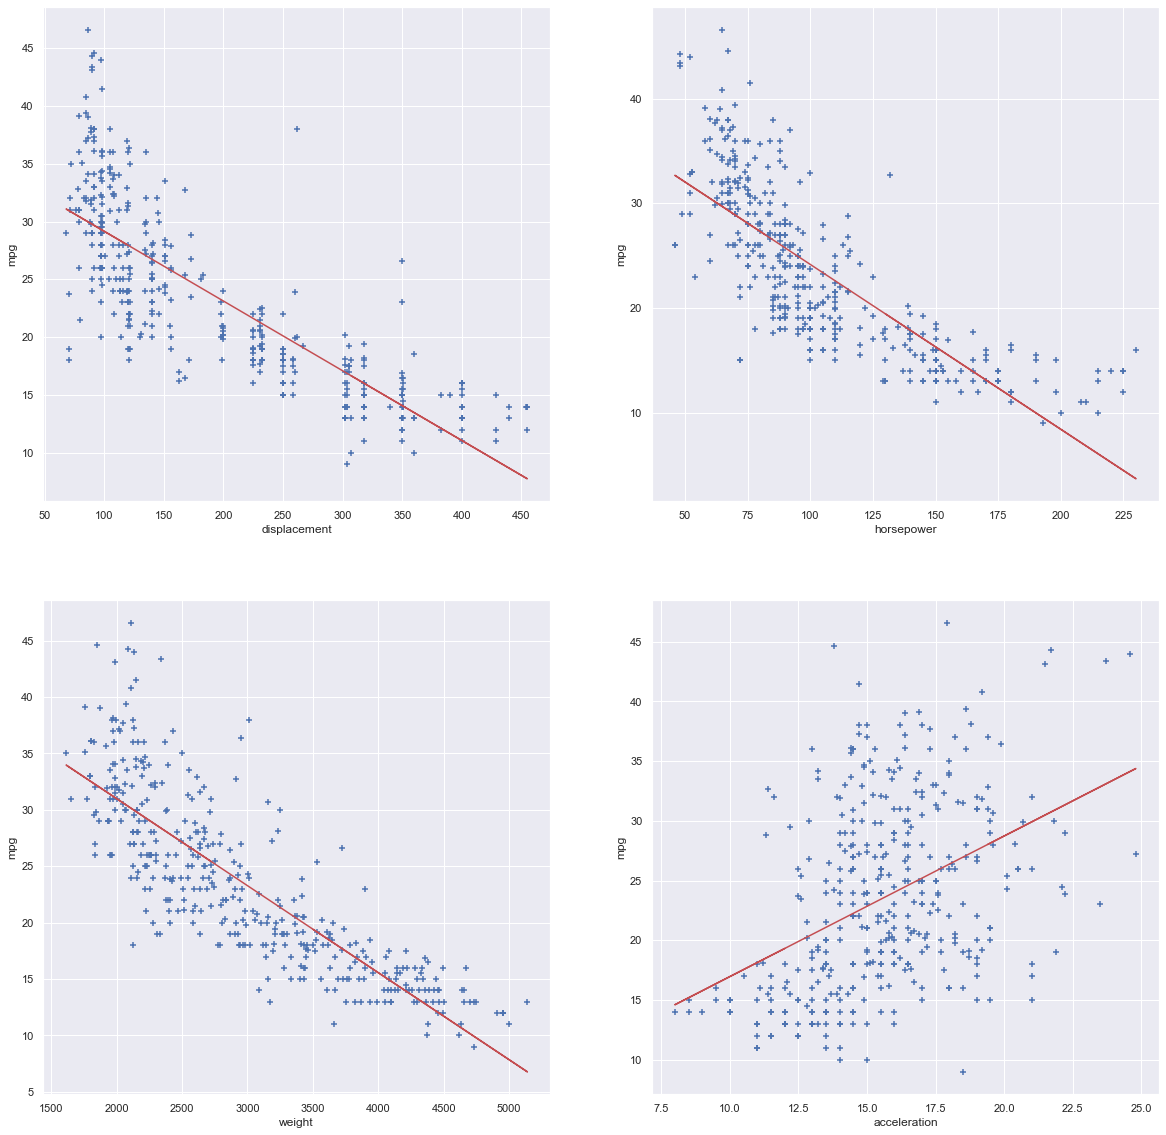

In [44]:
fig, axes = plt.subplots(2,2,figsize=(20,20))
axes[0, 0].scatter(X_displacement, y, marker='+')
axes[0, 0].plot(X_displacement, y_displacement_reg, color='r')
axes[0, 0].set_xlabel('displacement')
axes[0, 0].set_ylabel('mpg')

axes[0, 1].scatter(X_horsepower, y, marker='+')
axes[0, 1].plot(X_horsepower, y_horsepower_reg, color='r')
axes[0, 1].set_xlabel('horsepower')
axes[0, 1].set_ylabel('mpg')

axes[1, 0].scatter(X_weight, y, marker='+')
axes[1, 0].plot(X_weight, y_weight_reg, color='r')
axes[1, 0].set_xlabel('weight')
axes[1, 0].set_ylabel('mpg')

axes[1, 1].scatter(X_acceleration, y, marker='+')
axes[1, 1].plot(X_acceleration, y_acceleration_reg, color='r')
axes[1, 1].set_xlabel('acceleration')
axes[1, 1].set_ylabel('mpg')

### For view if it give us better performance and results

In [45]:
def create_polynomial_regressor(X, y, deg=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    poly_regressor = PolynomialFeatures(degree=deg)
    X_poly = poly_regressor.fit_transform(X_train)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_poly, y_train)
    y_pred = linear_regressor.predict(poly_regressor.fit_transform(X_test))
    print('MSE is eqal {}'.format(mean_squared_error(y_test, y_pred)))

    return linear_regressor.predict(poly_regressor.fit_transform(X))

In [46]:
y_displacement_poly_reg = create_polynomial_regressor(X_displacement, y)
y_horsepower_poly_reg = create_polynomial_regressor(X_horsepower, y)
y_weight_poly_reg = create_polynomial_regressor(X_weight, y)
y_acceleration_poly_reg = create_polynomial_regressor(X_acceleration, y)

MSE is eqal 18.23214587234863
MSE is eqal 15.915739357439936
MSE is eqal 20.435700084942873
MSE is eqal 44.73934983233357


Text(0, 0.5, 'mpg')

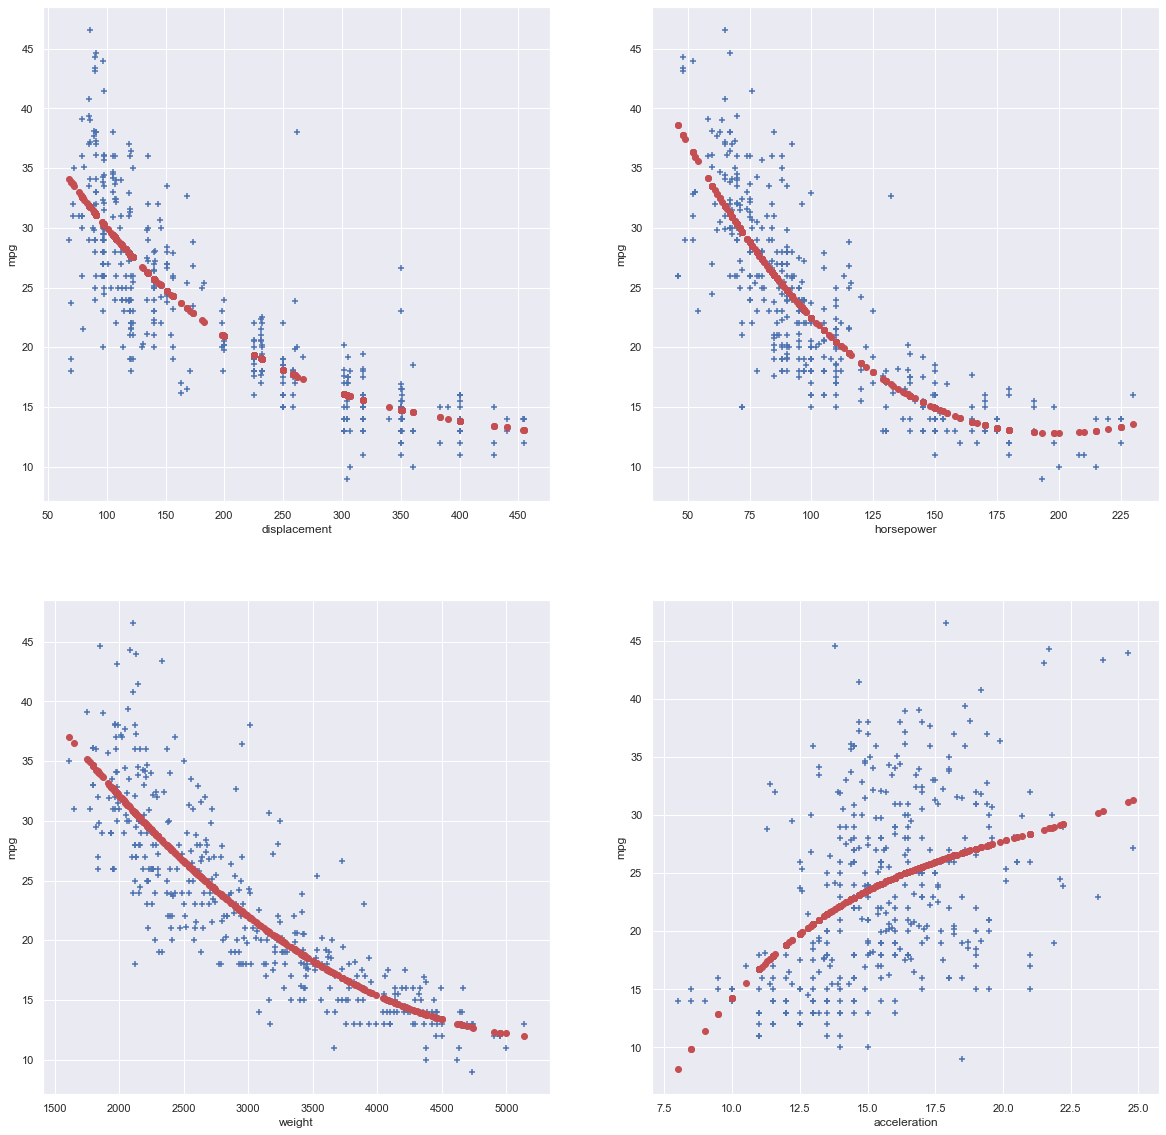

In [47]:
fig, axes = plt.subplots(2,2,figsize=(20,20))
axes[0, 0].scatter(X_displacement, y, marker='+')
axes[0, 0].scatter(X_displacement, y_displacement_poly_reg, color='r')
axes[0, 0].set_xlabel('displacement')
axes[0, 0].set_ylabel('mpg')

axes[0, 1].scatter(X_horsepower, y, marker='+')
axes[0, 1].scatter(X_horsepower, y_horsepower_poly_reg, color='r')
axes[0, 1].set_xlabel('horsepower')
axes[0, 1].set_ylabel('mpg')

axes[1, 0].scatter(X_weight, y, marker='+')
axes[1, 0].scatter(X_weight, y_weight_poly_reg, color='r')
axes[1, 0].set_xlabel('weight')
axes[1, 0].set_ylabel('mpg')

axes[1, 1].scatter(X_acceleration, y, marker='+')
axes[1, 1].scatter(X_acceleration, y_acceleration_poly_reg, color='r')
axes[1, 1].set_xlabel('acceleration')
axes[1, 1].set_ylabel('mpg')

#### More degrees -> little better results

In [48]:
y_displacement_poly_reg = create_polynomial_regressor(X_displacement, y, deg=4)
y_horsepower_poly_reg = create_polynomial_regressor(X_horsepower, y, deg=4)
y_weight_poly_reg = create_polynomial_regressor(X_weight, y, deg=4)
y_acceleration_poly_reg = create_polynomial_regressor(X_acceleration, y, deg=4)

MSE is eqal 18.243908613502747
MSE is eqal 15.778293572753872
MSE is eqal 20.33198905869183
MSE is eqal 43.06320022183981


Text(0, 0.5, 'mpg')

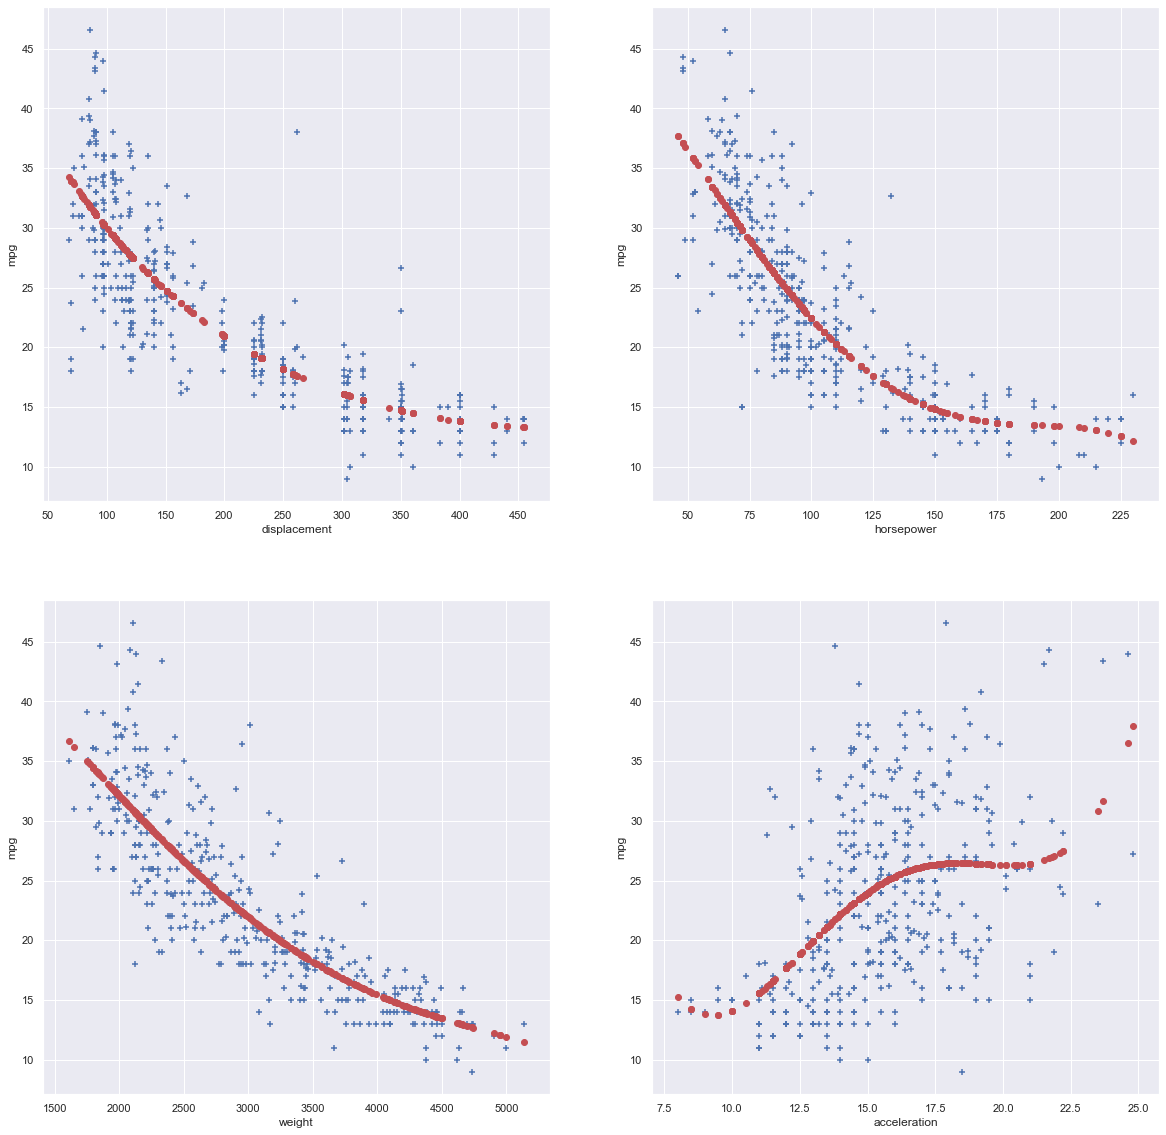

In [49]:
fig, axes = plt.subplots(2,2,figsize=(20,20))
axes[0, 0].scatter(X_displacement, y, marker='+')
axes[0, 0].scatter(X_displacement, y_displacement_poly_reg, color='r')
axes[0, 0].set_xlabel('displacement')
axes[0, 0].set_ylabel('mpg')

axes[0, 1].scatter(X_horsepower, y, marker='+')
axes[0, 1].scatter(X_horsepower, y_horsepower_poly_reg, color='r')
axes[0, 1].set_xlabel('horsepower')
axes[0, 1].set_ylabel('mpg')

axes[1, 0].scatter(X_weight, y, marker='+')
axes[1, 0].scatter(X_weight, y_weight_poly_reg, color='r')
axes[1, 0].set_xlabel('weight')
axes[1, 0].set_ylabel('mpg')

axes[1, 1].scatter(X_acceleration, y, marker='+')
axes[1, 1].scatter(X_acceleration, y_acceleration_poly_reg, color='r')
axes[1, 1].set_xlabel('acceleration')
axes[1, 1].set_ylabel('mpg')